#### This notebook was entirely written by Igor Moura (@igordpm), and it is intended to be a detailed guide for beginners on how to preprocess a pandas dataframe so that ML algorithms can be trained on it.
This is a *basics-only* notebook, so don't expect any complex-statistics or high-level-ML-features.

$~$

Let's start by importing some libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Let's read the data on life expectancy and take a look at it.

In [2]:
df = pd.read_csv('data/Life Expectancy Data.csv')

df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Good! Now let's take a look at the number of rows, columns and their names and dtypes.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Uh-oh... Looks like we've got some null values. Plus, some columns have unwanted whitespaces (e.g., ' BMI', ' HIV/AIDS', ' thinness  1-19 years', etc.).

At least their dtypes are all correct!

Let's adjust the initial and ending space on the name of the columns. Python has a `str.strip()` method for that, where leading and trailing whitespaces are removed from a string.

In [4]:
df.columns = df.columns.str.strip()

The columns are being ommited, but trust me, that went just as it should. Now let's replace all double whitespaces for a single whitespace, and then see how the columns look like.

In [5]:
df.columns = df.columns.str.replace("  ", " ")

df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness 1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

Ok, this is so much better! Now let's take a look at those pesky null-values:

In [6]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 1-19 years                 34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Since we want to predict life expectancy (our **label**), we should not have null values in this column. Therefore, it is safe to drop those 10 rows with NaN values.

While we are at it, let's take a look at them before dropping.

In [7]:
df[df['Life expectancy'].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


Those rows don't look very good, indeed. We can safely drop them, and then check if the new shape is 10 units lower than the original shape (which was 2938).

In [8]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [9]:
df = df.dropna(subset=['Life expectancy'])

df.shape

(2928, 22)

So far so good, but what about all the other NaN's?

We have a few options:

* #### Drop all of them, no pity.
This, however, could leave some countries with very few data, or even delete a good chunk of the dataset!


* #### Manually change or delete every single null value in the dataframe.
Ugh... Lenghty...


* #### Fill all NaN's with 0.
This usually looks like the best approach, but consider switching a NaN value in the *Population* column for 0. Having 0 population doesn't seem reasonable, right?


* #### Fill all NaN's with the mean value of its column.
Every column contains thousands of values from different countries, so picking a single average value for each column doesn't seem reasonable as well. A better approach would be to fill the values with the mean of that country's missing data. Let's see Liberia's data on alcohol consumption by year:

In [10]:
df.query("Country == 'Liberia'")[['Year', 'Alcohol']]

,Year,Alcohol
1490,2015,NaN
1491,2014,0.01
1492,2013,0.01
1493,2012,0.01
1494,2011,3.72
1495,2010,3.64
1496,2009,3.75
1497,2008,3.88
1498,2007,4.03
1499,2006,4.05


Hmmm, a decreasing trend is clearly seen, so filling that NaN with the mean value would be a huge mistake, right?

But then how do we proceed with those null values? The ***best*** approach, in this scenario, is highly debatable.

Let's first consider the drop-all-nulls option. How much data would be lost, compared to the original dataset and how many rows would be left?

In [11]:
print(f"{(1 - df.dropna().shape[0]/df.shape[0]) * 100}% of the data would be lost.", f"{df.dropna().shape[0]} rows out of the original {df.shape[0]} would remain.", sep="\n\n")

43.681693989071036% of the data would be lost.

1649 rows out of the original 2928 would remain.


$~$

That's almost half the data gone in a single line of code! *Yes, we are **that** powerful.*

Not to mention that some countries might have been left with only a few entries in the dataframe.

Let's take a look if that is the case:

In [12]:
df.dropna()['Country'].value_counts()

Afghanistan          16
Albania              16
Kiribati             15
Mexico               15
Mauritius            15
                     ..
Ireland               5
Sweden                4
Netherlands           4
Haiti                 2
Equatorial Guinea     1
Name: Country, Length: 133, dtype: int64

Whoa, some countries were left with as few as a single entry!

Let's see how many countries have at least 10 entries, if we were to drop all NaN's:

In [13]:
print(f"{df.dropna()['Country'].value_counts().ge(10).sum()} countries out of {df['Country'].nunique()} have 10 or more entries.")

109 countries out of 183 have 10 or more entries.


Well, not *that* bad...

### Maybe dropping all NaN's is not a bad idea?
That is hard to answer, but we can try. One possible approach is to create a model using the NaN-free dataframe and then checking which features have low impact when predicting life expectancy. Then, we can go back to the original dataframe, remove the unnecessary columns and check how many NaN's are left. Will they stay? Will they go? Let's find out.

---

## About that NaN-free dataframe...

Let's first create a copy from the original `df` and name it `dropped`.

In [14]:
dropped = df.dropna().copy()

Checking the correlation of all features against Life expectancy.

In [40]:
dropped.corr()['Life expectancy'].sort_values()

Adult Mortality                   -0.702523
HIV/AIDS                          -0.592236
thinness 1-19 years               -0.457838
thinness 5-9 years                -0.457508
under-five deaths                 -0.192265
infant deaths                     -0.169074
Measles                           -0.068881
Population                        -0.022305
Year                               0.050771
Total expenditure                  0.174718
Hepatitis B                        0.199935
Polio                              0.327294
Diphtheria                         0.341331
Alcohol                            0.402718
percentage expenditure             0.409631
GDP                                0.441322
BMI                                0.542042
Income composition of resources    0.721083
Schooling                          0.727630
Life expectancy                    1.000000
Name: Life expectancy, dtype: float64

In [ ]:
## draft from here on

In [16]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split

linear = LinearRegression()
X = dropped.iloc[:,3:]
y = X.pop('Life expectancy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

linear.fit(X_train, y_train)

LinearRegression()

In [17]:
X

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [18]:
X_train

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
236,253.0,1,11.17,23.835786,56.0,21,55.8,1,53.0,6.59,5.0,0.1,1819.525644,9796749.0,2.5,2.6,0.695,13.9
145,119.0,5,0.01,306.182431,94.0,0,51.5,6,97.0,6.40,94.0,0.1,7891.299776,953579.0,2.8,2.9,0.752,12.2
604,271.0,2,0.26,45.090108,28.0,0,18.4,2,8.0,3.65,8.0,0.1,544.566526,583211.0,7.6,7.6,0.000,9.2
1622,271.0,54,0.61,101.811400,66.0,24,21.3,90,72.0,6.59,66.0,1.5,835.889980,1554989.0,8.5,8.3,0.404,7.5
2036,221.0,68,4.42,0.099872,42.0,7003,18.7,89,77.0,2.79,79.0,0.1,1.681350,813526.0,1.0,9.7,0.625,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,22.0,0,11.00,561.916864,94.0,103,57.5,0,97.0,6.40,95.0,0.1,4146.987928,344367.0,3.3,3.3,0.770,15.3
1610,82.0,0,1.78,6.491489,98.0,20,19.5,0,98.0,6.64,98.0,0.1,52.862285,349.0,14.3,14.4,0.632,11.9
244,8.0,0,10.11,713.529735,97.0,576,62.3,1,98.0,1.42,98.0,0.1,4772.774150,1147744.0,0.9,0.9,0.884,16.1
1497,281.0,10,3.88,40.033441,64.0,1,23.4,14,79.0,11.83,75.0,2.4,232.617320,3662993.0,7.7,7.6,0.394,9.8


In [19]:
y_train

236     67.7
145     72.5
604     59.6
1622    56.8
2036    66.8
        ... 
1535    71.4
1610    75.4
244     83.0
1497    58.6
1759    72.0
Name: Life expectancy, Length: 1104, dtype: float64

In [20]:
linear.predict(X_test)

array([71.83067732, 59.99803868, 67.38312797, 69.30281525, 73.41715259,
       66.94202406, 71.75324535, 54.26304901, 52.67891499, 68.14261094,
       73.41212689, 50.26025115, 72.39296436, 73.23864112, 65.07615898,
       70.30829688, 72.58209701, 51.4620959 , 67.60156544, 56.8405373 ,
       59.26354161, 63.98974515, 61.2275386 , 79.51196117, 73.25624542,
       70.16368651, 66.12296759, 55.76750904, 64.35600907, 46.95083569,
       74.55994782, 80.287916  , 75.09992938, 65.35670122, 77.28888754,
       83.44516346, 68.82893481, 70.31670779, 62.18678966, 66.63469175,
       79.07682591, 77.84946277, 67.44730795, 65.72278425, 59.08714809,
       74.77040849, 59.24447781, 70.06770484, 63.07664534, 57.09747687,
       71.79594151, 67.62574992, 74.65845564, 78.17362407, 76.60929348,
       69.40154608, 64.72247512, 75.11173937, 72.08303088, 76.67014067,
       74.39936183, 62.96129578, 66.73983312, 72.52239279, 72.52415022,
       66.78905073, 67.46327975, 63.32276539, 51.03795669, 59.24

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

r2_score(y_test, linear.predict(X_test))

0.8290910259917569

In [22]:
mean_squared_error(y_test, linear.predict(X_test))

12.752369807198882

In [23]:
linear.coef_

array([-1.85235175e-02,  9.30568400e-02, -1.77123193e-02,  3.75406691e-04,
       -5.93373582e-03, -1.26833994e-05,  3.25155848e-02, -6.92045427e-02,
        1.16908149e-02,  7.83836256e-02,  6.97206381e-03, -4.31573349e-01,
        1.14109573e-05, -1.47576229e-09, -2.83308398e-02, -5.12480272e-02,
        8.57474307e+00,  9.22265613e-01])

In [24]:
l1 = Lasso(max_iter=10000)

In [25]:
l1.fit(X_train, y_train)

Lasso(max_iter=10000)

In [26]:
r2_score(y_test, l1.predict(X_test))

0.8087684951409513

In [27]:
l1.coef_

array([-2.24085603e-02,  7.49802678e-02,  2.01398049e-03,  2.09145437e-04,
       -4.60731787e-03, -2.71204697e-06,  5.28914413e-02, -5.67085724e-02,
        1.13703647e-02,  0.00000000e+00,  1.66316837e-02, -3.93421406e-01,
        6.42759689e-05,  1.31459946e-11, -4.40262894e-02, -6.66154751e-03,
        0.00000000e+00,  1.04325097e+00])

In [28]:
X_train.columns

Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio',
       'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness 1-19 years', 'thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [29]:
mean_squared_error(y_test, l1.predict(X_test))

14.268735055609895

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
std = StandardScaler()

In [32]:
pd.DataFrame(std.fit_transform(X_train))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.686011,-0.255695,1.650380,-0.377842,-0.891713,-0.216493,0.893124,-0.259333,-1.337385,0.252250,-3.498651,-0.304431,-0.316107,-0.079395,-0.501976,-0.488739,0.347566,0.628687
1,-0.402891,-0.225219,-1.116284,-0.221912,0.574622,-0.218669,0.676129,-0.231124,0.588012,0.170659,0.452335,-0.304431,0.195079,-0.194424,-0.439659,-0.427166,0.650049,0.023600
2,0.832281,-0.248076,-1.054307,-0.366104,-1.972171,-0.218669,-0.994225,-0.253691,-3.306542,-1.010269,-3.365472,-0.304431,-0.423446,-0.199242,0.557406,0.537485,-3.340602,-1.044200
3,0.832281,0.148117,-0.967539,-0.334779,-0.505835,-0.216182,-0.847880,0.242775,-0.505964,0.252250,-0.790672,-0.075184,-0.398919,-0.186601,0.744356,0.681156,-1.196689,-1.649287
4,0.425974,0.254784,-0.023006,-0.390950,-1.431942,0.506969,-0.979086,0.237134,-0.287169,-1.379578,-0.213561,-0.304431,-0.469152,-0.196246,-0.813559,0.968499,-0.023904,-0.261147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,-1.191126,-0.263314,1.608235,-0.080679,0.574622,-0.207996,0.978913,-0.264974,0.588012,0.170659,0.496728,-0.304431,-0.120157,-0.202349,-0.335798,-0.345068,0.745570,1.126993
1100,-0.703558,-0.263314,-0.677485,-0.387420,0.728973,-0.216596,-0.938715,-0.264974,0.631771,0.273722,0.629908,-0.304431,-0.464843,-0.206824,1.949143,1.933150,0.013243,-0.083180
1101,-1.304892,-0.263314,1.387596,0.003051,0.690386,-0.158985,1.221139,-0.259333,0.631771,-1.967895,0.629908,-0.304431,-0.067471,-0.191899,-0.834331,-0.837655,1.350535,1.411740
1102,0.913542,-0.187123,-0.156877,-0.368896,-0.583011,-0.218565,-0.741906,-0.185991,-0.199651,2.502456,-0.391134,0.072188,-0.449709,-0.159181,0.578178,0.537485,-1.249756,-0.830640


In [33]:
l1 = Lasso(max_iter=10000)

values = []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    
    l1.fit(std.fit_transform(X_train), y_train)
    values.append(r2_score(y_test, l1.predict(std.fit_transform(X_test))))

In [34]:
l1 = Lasso(max_iter=10000)

values = []

for i in range(1000):
    l1 = Lasso(max_iter=10000)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)
    
    l1.fit(std.fit_transform(X_train), y_train)
    values.append(l1.score(std.fit_transform(X_train), y_train))

<AxesSubplot:>

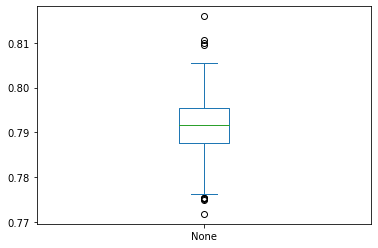

In [35]:
pd.Series(values).plot(kind='box')

In [36]:
pd.Series(values).quantile(.05)

0.7813924546553414

In [37]:
pd.Series(values).quantile(.95)

0.8011829893520239

In [38]:
pd.Series(l1.coef_, index=X_train.columns)

Adult Mortality                   -1.882643
infant deaths                     -0.000000
Alcohol                            0.000000
percentage expenditure             0.000000
Hepatitis B                        0.000000
Measles                           -0.000000
BMI                                0.468142
under-five deaths                 -0.000000
Polio                              0.000000
Total expenditure                  0.000000
Diphtheria                         0.000000
HIV/AIDS                          -2.051575
GDP                                0.000000
Population                        -0.000000
thinness 1-19 years               -0.000000
thinness 5-9 years                -0.000000
Income composition of resources    1.852337
Schooling                          2.405040
dtype: float64

In [39]:
l1.score(std.fit_transform(X_train), y_train)

0.7913093349591692